___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import scipy.stats as stats

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [2]:
df = pd.read_csv("final_scout_dummy.csv")

In [3]:
df.head(5)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,

In [4]:
df.shape

(15915, 143)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Columns: 143 entries, price to Drive_chain_rear
dtypes: float64(8), int64(135)
memory usage: 17.4 MB


In [6]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.00000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.0000

In [7]:
#df.corr()

In [8]:
df.columns

Index(['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb',
       ...
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD', 'Drive_chain_front',
       'Drive_chain_rear'],
      dtype='object', length=143)

In [9]:
X = df.drop("price", axis=1)
X

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [10]:
y= df["price"]
y

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15910    39950
15911    39885
15912    39875
15913    39700
15914    40999
Name: price, Length: 15915, dtype: int64

In [11]:
for i in df.drop(columns ="price"):
    print(f"corr between price and {i:<40}:  {df.price.corr(df[i])}") # 40 tab mesafesi

corr between price and km                                      :  -0.3992911849244733
corr between price and Gears                                   :  0.5302911639311406
corr between price and age                                     :  -0.473478082068511
corr between price and Previous_Owners                         :  -0.1446276789356047
corr between price and hp_kW                                   :  0.6964113376348818
corr between price and Inspection_new                          :  0.008179563373723794
corr between price and Displacement_cc                         :  0.2818242014573901
corr between price and Weight_kg                               :  0.4684332296998498
corr between price and cons_comb                               :  0.2722609656930565
corr between price and cc_Air conditioning                     :  0.07574761232919704
corr between price and cc_Air suspension                       :  0.06320842600573104
corr between price and cc_Armrest                          

In [12]:
#plt.rcParams["figure.figsize"] = (60,60)
#sns.heatmap(df.corr(), annot =True)

### Train | Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11140, 142)
Train target shape   :  (11140,)
Test features shape  :  (4775, 142)
Test target shape    :  (4775,)


In [16]:
X_train

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
11693,7800.000000,6.0,1.0,1.0,100.0,1,1598.0,1503.0,4.2,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
6424,32500.000000,5.0,3.0,1.0,85.0,0,1598.0,1425.0,6.3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
8309,9196.000000,6.0,1.0,1.0,66.0,1,1398.0,1163.0,5.9,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
14939,18000.000000,6.0,1.0,1.0,118.0,0,1598.0,1734.0,4.6,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [17]:
from sklearn.linear_model import LinearRegression

## Scaling the Data

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() 
# genelde standartScaler ile z score alıyoruz  ama katogorik verilerde ve dumylerde minmaxscaler, outlier olduğunda robustscaler kullanılıyor.
#StandartScaler z score mean=0, SS=1 a dönüştürüyor +3 ile -3 arasında 

In [19]:
scaler.fit(X_train) 
#X ait ortalama ve standart sapma bilgilerini alıyor.
#fit işlemi sadece traine uygulanıyor.

MinMaxScaler()

In [20]:
X_train_scaled= scaler.transform(X_train)
X_train_scaled

array([[0.02460568, 0.33333333, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.10252366, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02900946, 0.33333333, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.04544164, 0.66666667, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.00519673, 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08922713, 0.33333333, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [21]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[1.86119874e-02, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.19558360e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.52365931e-02, 0.00000000e+00, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.14511041e-02, 0.00000000e+00, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.51735016e-02, 3.33333333e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20820189e-01, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [23]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred = lm.predict(X_test_scaled) #test setinin prediction , eğitim ve test karşılaştırıp overfit, underfit vb kontrol edebilebilir.
y_train_pred = lm.predict(X_train_scaled) #eğitim setinin prediction 

In [25]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
12887,26379,25372.00,1007.00
8140,18990,18900.25,89.75
6835,12490,12429.00,61.00
15439,32975,35120.00,-2145.00
1213,15888,14284.00,1604.00
13187,15480,14920.50,559.50
1034,20500,22676.25,-2176.25
2864,16760,15615.50,1144.50
7061,18990,18043.25,946.75
14983,27000,24610.50,2389.50


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [28]:
pd.options.display.float_format = '{:.8f}'.format
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #train val R2 değeri bilimsel gösterildiğinde anlaşılmıyor. 0.89 olmalı eval metric daha anlaşılır
ls

,linear_train,linear_test
R2,0.89170457,-276322872439066656.00000000
mae,1691.46961400,56109591563.92617798
mse,5904350.59723968,15033065978993210644496384.00000000
rmse,2429.88695153,3877249795795.10839844


In [29]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [30]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8917045670749983
MAE 		: 1691.4696140035908
MSE 		: 5904350.597239677
RMSE 		: 2429.886951534922


In [31]:
pd.options.display.float_format = '{:.8f}'.format
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: -2.7632287243906666e+17
MAE 		: 56109591563.92618
MSE 		: 1.503306597899321e+25
RMSE 		: 3877249795795.1084


In [32]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [33]:
adj_r2(y_test, y_pred, df)

-2.7881068932255306e+17

In [34]:
def color_red(val):
    
    if val > 0.9 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [35]:
#pd.DataFrame(X).corr().style.applymap(color_red)

In [36]:
residuals = y_test-y_pred

## Cross Validate

In [37]:
from sklearn.model_selection import cross_validate, cross_val_score

In [38]:
lcm = LinearRegression()
scores = cross_validate(lcm, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [39]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.07380247,0.00797915,0.88582194,-1743.92888660,-6209396.22037500,-2491.86601172
2,0.08477235,0.00797892,0.88428937,-1727.32071289,-6120021.68035303,-2473.86775725
3,0.07280517,0.02094388,0.88782959,-1674.37612385,-5621053.20008916,-2370.87604064
4,0.05884385,0.00798059,0.88823152,-1774.81996508,-6957295.62791944,-2637.66859706
5,0.06283021,0.00598431,0.88792043,-1685.54462870,-5927206.44013182,-2434.58547604


In [40]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                                   0.88681857
test_neg_mean_absolute_error          -1721.19806342
test_neg_mean_squared_error        -6166994.63377369
test_neg_root_mean_squared_error      -2481.77277654
dtype: float64

In [41]:
pd.options.display.float_format = '{:.8f}'.format
train_val(y_train, y_train_pred, y_test, y_pred, "linear")


,linear_train,linear_test
R2,0.89170457,-276322872439066656.00000000
mae,1691.46961400,56109591563.92617798
mse,5904350.59723968,15033065978993210644496384.00000000
rmse,2429.88695153,3877249795795.10839844


In [42]:
lm.coef_

array([-1.13399069e+04,  1.88598569e+03, -4.88026134e+03,  3.61074250e+02,
        2.37400734e+04, -2.52411708e+02, -1.10875429e+03, -2.30781116e+03,
        7.39518778e+02,  2.47334797e+02, -6.29803077e+02,  3.09392466e+01,
        2.28118655e+02, -2.53990881e+02,  2.40085001e+02, -1.22640388e+03,
       -4.22719543e+01,  4.91871375e+01,  1.05864636e+02,  3.81000246e+02,
        2.44951179e+03,  3.10106137e+02,  1.42748665e+02,  1.16896613e+02,
       -5.15688524e+02,  1.67302327e+02,  1.28756196e+02, -3.97783806e+02,
        4.28740807e+02,  1.58717299e+02,  3.16337489e+02, -1.80033033e+02,
        7.05158614e+02, -1.73424025e+01,  9.82796937e+02,  3.28629217e+02,
       -5.63280699e+02,  5.23973146e+01, -2.70110742e+02,  2.51567201e+01,
        9.13309728e+02, -2.01782160e+02,  6.83423419e+00,  5.55727725e+02,
        6.57065952e+01, -1.14107292e+03, -2.50772021e+02, -4.64597577e+02,
        8.56859674e+01,  8.00442185e+02, -7.98756814e+01,  3.12504869e+01,
       -5.73400516e+00,  

In [43]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df.head(5)

,lm_coef
0,-11339.90694085
1,1885.98568799
2,-4880.26134171
3,361.07424958
4,23740.07340031


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge_model = Ridge(alpha=1, random_state=42)

In [46]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [47]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [48]:
pd.options.display.float_format = '{:.8f}'.format
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.89162576,0.88537604
mae,1689.89107944,1752.09496654
mse,5908646.95741234,6236000.24610614
rmse,2430.77085662,2497.19847952


In [49]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.89170457,-276322872439066656.00000000,0.89162576,0.88537604
mae,1691.46961400,56109591563.92617798,1689.89107944,1752.09496654
mse,5904350.59723968,15033065978993210644496384.00000000,5908646.95741234,6236000.24610614
rmse,2429.88695153,3877249795795.10839844,2430.77085662,2497.19847952


In [50]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [51]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.03490448,0.00299263,0.88585538,-1738.90438887,-6207578.05636911,-2491.50116524
2,0.03390980,0.00398970,0.88447117,-1722.03598674,-6110406.00668351,-2471.92354386
3,0.03291249,0.00299025,0.88842675,-1672.82908026,-5591128.48140494,-2364.55671985
4,0.03291273,0.00199580,0.88792505,-1773.82351458,-6976372.21193317,-2641.28230448
5,0.02201271,0.01200628,0.88960668,-1679.54559310,-5838030.88202203,-2416.20174696


In [52]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                   0.88725701
test_neg_mean_absolute_error          -1717.42771271
test_neg_mean_squared_error        -6144703.12768255
test_neg_root_mean_squared_error      -2477.09309608
dtype: float64

In [53]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.89162576,0.88537604
mae,1689.89107944,1752.09496654
mse,5908646.95741234,6236000.24610614
rmse,2430.77085662,2497.19847952


<AxesSubplot:>

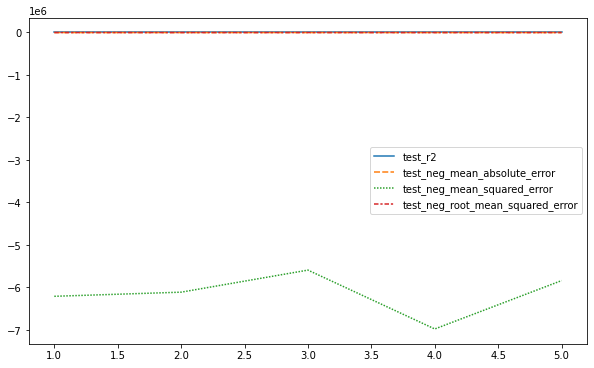

In [54]:
sns.lineplot(data = scores.iloc[:,2:])

In [55]:
ridge_model.coef_

array([-1.11052473e+04,  1.87684702e+03, -4.92845013e+03,  3.86702721e+02,
        2.24001960e+04, -2.59287936e+02, -6.38228998e+02, -2.06403916e+03,
        9.04107862e+02,  2.58931314e+02, -5.69095136e+02,  3.17685671e+01,
        2.25354097e+02, -2.65015344e+02,  2.39571755e+02, -5.97011551e+02,
       -3.59883365e+01,  4.75330011e+01,  1.05498276e+02,  3.69144050e+02,
        2.44154855e+03,  2.93324941e+02,  1.40890656e+02,  1.19287840e+02,
       -4.33590819e+02,  1.64079929e+02,  1.33567471e+02, -4.02744337e+02,
        4.35537667e+02,  1.58037312e+02,  3.23156609e+02, -1.71966080e+02,
        7.14465095e+02, -1.58096275e+01,  9.77446530e+02,  3.22254334e+02,
       -5.68888716e+02,  5.23013153e+01, -2.61040174e+02,  3.58413559e+01,
        9.06402007e+02, -1.96783682e+02,  2.48479588e+01,  5.72971246e+02,
        5.97485564e+01, -1.15176226e+03, -2.44471951e+02, -4.64206208e+02,
        7.98416613e+01,  8.08700896e+02, -7.55752319e+01,  2.63131540e+01,
       -8.96725155e+00,  

In [56]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [57]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-11339.90694085,-11105.24731502
1,1885.98568799,1876.84702052
2,-4880.26134171,-4928.45013207
3,361.07424958,386.70272097
4,23740.07340031,22400.19596495
5,-252.41170811,-259.28793649
6,-1108.75428575,-638.22899834
7,-2307.81116125,-2064.03916006
8,739.51877794,904.10786159
9,247.33479743,258.93131371


## Choosing best alpha value with Cross-Validation

In [58]:
from sklearn.linear_model import RidgeCV

In [59]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [60]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

Using Best Hyper Parameters From GridSearch

In [61]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [62]:
ridge_cv_model.alpha_

1.0

In [63]:
ridge_cv_model.best_score_  # ridge(alpha=0.07)

-2477.0930960769647

In [64]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [65]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.89162576,0.88537604
mae,1689.89107944,1752.09496654
mse,5908646.95741234,6236000.24610614
rmse,2430.77085662,2497.19847952


In [66]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.89170457,-276322872439066656.00000000,0.89162576,0.88537604,0.89162576,0.88537604
mae,1691.46961400,56109591563.92617798,1689.89107944,1752.09496654,1689.89107944,1752.09496654
mse,5904350.59723968,15033065978993210644496384.00000000,5908646.95741234,6236000.24610614,5908646.95741234,6236000.24610614
rmse,2429.88695153,3877249795795.10839844,2430.77085662,2497.19847952,2430.77085662,2497.19847952


In [67]:
ridge_cv_model.coef_

array([-1.11052473e+04,  1.87684702e+03, -4.92845013e+03,  3.86702721e+02,
        2.24001960e+04, -2.59287936e+02, -6.38228998e+02, -2.06403916e+03,
        9.04107862e+02,  2.58931314e+02, -5.69095136e+02,  3.17685671e+01,
        2.25354097e+02, -2.65015344e+02,  2.39571755e+02, -5.97011551e+02,
       -3.59883365e+01,  4.75330011e+01,  1.05498276e+02,  3.69144050e+02,
        2.44154855e+03,  2.93324941e+02,  1.40890656e+02,  1.19287840e+02,
       -4.33590819e+02,  1.64079929e+02,  1.33567471e+02, -4.02744337e+02,
        4.35537667e+02,  1.58037312e+02,  3.23156609e+02, -1.71966080e+02,
        7.14465095e+02, -1.58096275e+01,  9.77446530e+02,  3.22254334e+02,
       -5.68888716e+02,  5.23013153e+01, -2.61040174e+02,  3.58413559e+01,
        9.06402007e+02, -1.96783682e+02,  2.48479588e+01,  5.72971246e+02,
        5.97485564e+01, -1.15176226e+03, -2.44471951e+02, -4.64206208e+02,
        7.98416613e+01,  8.08700896e+02, -7.55752319e+01,  2.63131540e+01,
       -8.96725155e+00,  

In [68]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_1"])

In [69]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_1
0,-11339.90694085,-11105.24731502,-11105.24731502
1,1885.98568799,1876.84702052,1876.84702052
2,-4880.26134171,-4928.45013207,-4928.45013207
3,361.07424958,386.70272097,386.70272097
4,23740.07340031,22400.19596495,22400.19596495
5,-252.41170811,-259.28793649,-259.28793649
6,-1108.75428575,-638.22899834,-638.22899834
7,-2307.81116125,-2064.03916006,-2064.03916006
8,739.51877794,904.10786159,904.10786159
9,247.33479743,258.93131371,258.93131371


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [70]:
from sklearn.linear_model import Lasso, LassoCV

In [71]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [72]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [73]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.89134938,0.88526646
mae,1692.32540236,1752.99371718
mse,5923715.44875813,6241961.83209110
rmse,2433.86841238,2498.39184919


In [74]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.89170457,-276322872439066656.00000000,0.89162576,0.88537604,0.89162576,0.88537604,0.89134938,0.88526646
mae,1691.46961400,56109591563.92617798,1689.89107944,1752.09496654,1689.89107944,1752.09496654,1692.32540236,1752.99371718
mse,5904350.59723968,15033065978993210644496384.00000000,5908646.95741234,6236000.24610614,5908646.95741234,6236000.24610614,5923715.44875813,6241961.83209110
rmse,2429.88695153,3877249795795.10839844,2430.77085662,2497.19847952,2430.77085662,2497.19847952,2433.86841238,2498.39184919


In [75]:
lasso_model.coef_

array([-1.11773821e+04,  1.83320740e+03, -4.90940622e+03,  2.16605126e+02,
        2.31748868e+04, -2.45968721e+02, -6.98891352e+02, -1.71830995e+03,
        5.95365010e+02,  2.32372230e+02, -3.37165543e+02,  3.90936394e+01,
        2.23872540e+02, -2.17992776e+02,  2.40779752e+02, -0.00000000e+00,
       -0.00000000e+00,  4.77601347e+01,  9.35235349e+01,  3.58864755e+02,
        2.41688173e+03,  2.90880049e+02,  1.39997323e+02,  1.16458308e+02,
       -3.31951840e+00,  1.68579796e+02,  1.14179457e+02, -3.98159586e+02,
        3.62450423e+02,  1.36562084e+02,  3.22121937e+02, -1.11250970e+02,
        6.92922054e+02, -7.16937235e+00,  9.76421455e+02,  3.07720668e+02,
       -5.33492244e+02,  4.07090807e+01, -2.37960217e+02,  2.83793190e+01,
        8.82181904e+02, -1.80376963e+02,  1.00214052e+00,  5.49413632e+02,
        1.06659171e+01, -7.91295177e+02, -0.00000000e+00, -4.52448030e+02,
        8.02045719e+01,  7.98958783e+02, -7.30277067e+01,  1.36584738e+01,
       -0.00000000e+00,  

## For Lasso CV with Default Alpha : 1

In [76]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [77]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.40378451,0.00398779,0.88640867,-1737.84193112,-6177488.21431836,-2485.45533340
2,0.33909321,0.00199556,0.88473446,-1722.14730969,-6096480.50520036,-2469.10520335
3,0.40233731,0.00199342,0.88918494,-1669.89948860,-5553134.70506439,-2356.50900806
4,0.34906626,0.00299239,0.88800044,-1775.46895781,-6971679.68261767,-2640.39384991
5,0.35305357,0.00299358,0.89046301,-1674.81937845,-5792744.79731687,-2406.81216494


In [78]:
scores.iloc[:,2:].mean()
#pd.DataFrame(scores, index = range(1, 6)).mean()

test_r2                                   0.88775830
test_neg_mean_absolute_error          -1716.03541313
test_neg_mean_squared_error        -6118305.58090353
test_neg_root_mean_squared_error      -2471.65511193
dtype: float64

In [79]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.89134938,0.88526646
mae,1692.32540236,1752.99371718
mse,5923715.44875813,6241961.83209110
rmse,2433.86841238,2498.39184919


<AxesSubplot:>

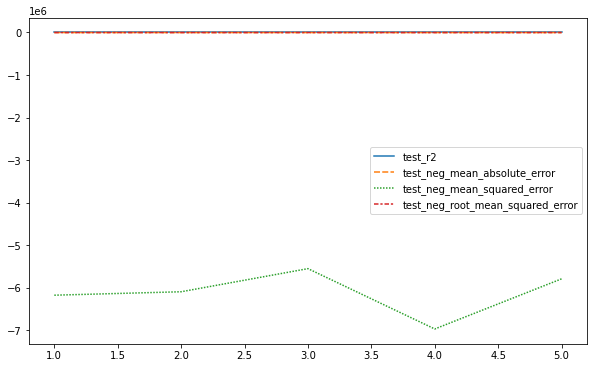

In [80]:
sns.lineplot(data = scores.iloc[:,2:])

In [81]:
lasso_model.coef_

array([-1.11773821e+04,  1.83320740e+03, -4.90940622e+03,  2.16605126e+02,
        2.31748868e+04, -2.45968721e+02, -6.98891352e+02, -1.71830995e+03,
        5.95365010e+02,  2.32372230e+02, -3.37165543e+02,  3.90936394e+01,
        2.23872540e+02, -2.17992776e+02,  2.40779752e+02, -0.00000000e+00,
       -0.00000000e+00,  4.77601347e+01,  9.35235349e+01,  3.58864755e+02,
        2.41688173e+03,  2.90880049e+02,  1.39997323e+02,  1.16458308e+02,
       -3.31951840e+00,  1.68579796e+02,  1.14179457e+02, -3.98159586e+02,
        3.62450423e+02,  1.36562084e+02,  3.22121937e+02, -1.11250970e+02,
        6.92922054e+02, -7.16937235e+00,  9.76421455e+02,  3.07720668e+02,
       -5.33492244e+02,  4.07090807e+01, -2.37960217e+02,  2.83793190e+01,
        8.82181904e+02, -1.80376963e+02,  1.00214052e+00,  5.49413632e+02,
        1.06659171e+01, -7.91295177e+02, -0.00000000e+00, -4.52448030e+02,
        8.02045719e+01,  7.98958783e+02, -7.30277067e+01,  1.36584738e+01,
       -0.00000000e+00,  

In [82]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [83]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_1,lasso_coef_1
0,-11339.90694085,-11105.24731502,-11105.24731502,-11177.38211092
1,1885.98568799,1876.84702052,1876.84702052,1833.20740256
2,-4880.26134171,-4928.45013207,-4928.45013207,-4909.40622207
3,361.07424958,386.70272097,386.70272097,216.60512551
4,23740.07340031,22400.19596495,22400.19596495,23174.88679015
5,-252.41170811,-259.28793649,-259.28793649,-245.96872091
6,-1108.75428575,-638.22899834,-638.22899834,-698.89135198
7,-2307.81116125,-2064.03916006,-2064.03916006,-1718.30994769
8,739.51877794,904.10786159,904.10786159,595.36500957
9,247.33479743,258.93131371,258.93131371,232.37223024


### Choosing best alpha value with Cross-Validation

In [84]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [85]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [86]:
lasso_cv_model.alpha_

1.0

In [87]:
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [88]:
lasso_cv_model.mse_path_.mean()

6133794.312950613

In [89]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [90]:
#pd.options.display.float_format = '{:.8f}'.format

In [91]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs


,lasso_cv_train,lasso_cv_test
R2,0.89134938,0.88526646
mae,1692.32540236,1752.99371718
mse,5923715.44875813,6241961.83209110
rmse,2433.86841238,2498.39184919


In [92]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.89170457,-276322872439066656.00000000,0.89162576,0.88537604,0.89162576,0.88537604,0.89134938,0.88526646,0.89134938,0.88526646
mae,1691.46961400,56109591563.92617798,1689.89107944,1752.09496654,1689.89107944,1752.09496654,1692.32540236,1752.99371718,1692.32540236,1752.99371718
mse,5904350.59723968,15033065978993210644496384.00000000,5908646.95741234,6236000.24610614,5908646.95741234,6236000.24610614,5923715.44875813,6241961.83209110,5923715.44875813,6241961.83209110
rmse,2429.88695153,3877249795795.10839844,2430.77085662,2497.19847952,2430.77085662,2497.19847952,2433.86841238,2498.39184919,2433.86841238,2498.39184919


In [93]:
lasso_cv_model.coef_

array([-1.11773821e+04,  1.83320740e+03, -4.90940622e+03,  2.16605126e+02,
        2.31748868e+04, -2.45968721e+02, -6.98891352e+02, -1.71830995e+03,
        5.95365010e+02,  2.32372230e+02, -3.37165543e+02,  3.90936394e+01,
        2.23872540e+02, -2.17992776e+02,  2.40779752e+02, -0.00000000e+00,
       -0.00000000e+00,  4.77601347e+01,  9.35235349e+01,  3.58864755e+02,
        2.41688173e+03,  2.90880049e+02,  1.39997323e+02,  1.16458308e+02,
       -3.31951840e+00,  1.68579796e+02,  1.14179457e+02, -3.98159586e+02,
        3.62450423e+02,  1.36562084e+02,  3.22121937e+02, -1.11250970e+02,
        6.92922054e+02, -7.16937235e+00,  9.76421455e+02,  3.07720668e+02,
       -5.33492244e+02,  4.07090807e+01, -2.37960217e+02,  2.83793190e+01,
        8.82181904e+02, -1.80376963e+02,  1.00214052e+00,  5.49413632e+02,
        1.06659171e+01, -7.91295177e+02, -0.00000000e+00, -4.52448030e+02,
        8.02045719e+01,  7.98958783e+02, -7.30277067e+01,  1.36584738e+01,
       -0.00000000e+00,  

In [94]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [95]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [96]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [97]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [98]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.61547816,0.62470442
mae,3283.90376352,3279.81586178
mse,20964427.77332826,20417575.67287820
rmse,4578.69280181,4518.58115705


In [99]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.89170457,-276322872439066656.00000000,0.89162576,0.88537604,0.89162576,0.88537604,0.89134938,0.88526646,0.89134938,0.88526646,0.61547816,0.62470442
mae,1691.46961400,56109591563.92617798,1689.89107944,1752.09496654,1689.89107944,1752.09496654,1692.32540236,1752.99371718,1692.32540236,1752.99371718,3283.90376352,3279.81586178
mse,5904350.59723968,15033065978993210644496384.00000000,5908646.95741234,6236000.24610614,5908646.95741234,6236000.24610614,5923715.44875813,6241961.83209110,5923715.44875813,6241961.83209110,20964427.77332826,20417575.67287820
rmse,2429.88695153,3877249795795.10839844,2430.77085662,2497.19847952,2430.77085662,2497.19847952,2433.86841238,2498.39184919,2433.86841238,2498.39184919,4578.69280181,4518.58115705


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [100]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [101]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.60968232,-3281.95523126,-21226820.99942589,-4607.25742708
2,0.61024955,-3328.06284470,-20614192.23974735,-4540.28547998
3,0.61874547,-3182.71677518,-19105324.28267037,-4370.96377046
4,0.60493441,-3470.92275648,-24591798.90202663,-4959.01188767
5,0.62622643,-3189.44868395,-19766608.81372657,-4445.96545350


In [102]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.61396764
test_neg_mean_absolute_error           -3290.62125831
test_neg_mean_squared_error        -21060949.04751936
test_neg_root_mean_squared_error       -4584.69680374
dtype: float64

In [103]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.61547816,0.62470442
mae,3283.90376352,3279.81586178
mse,20964427.77332826,20417575.67287820
rmse,4578.69280181,4518.58115705


In [104]:
elastic_model.coef_

array([-4.43707298e+02,  7.64888381e+02, -1.50284456e+03, -1.01158155e+02,
        4.97785499e+02, -1.54934662e+02,  2.82646078e+02,  3.64887349e+02,
        2.76596048e+02,  2.19533625e+01,  8.19647246e+00,  4.69922830e+02,
        7.49048518e+02, -0.00000000e+00,  5.73631578e+01, -0.00000000e+00,
        2.55004771e+02, -2.93970147e+02,  3.19777545e+02,  1.03353201e+02,
        4.10176948e+02, -4.75852274e+01, -2.18056686e+02,  2.71464805e+02,
        7.64242278e+00,  1.74798760e+02,  3.32612012e+02,  5.88523517e+01,
        2.22262274e+02,  2.05192191e+01,  4.28914895e+02,  2.55384077e+02,
        5.78116993e+02,  3.36358087e+02,  2.95487365e+02,  3.82897586e+02,
        2.46356712e+02, -1.27686792e+02,  4.01102239e+02,  4.05383407e+02,
        2.86118998e+02,  0.00000000e+00,  3.89120133e+02,  1.39728939e+02,
       -1.95125452e+01, -1.14744063e+01, -0.00000000e+00, -9.91071141e+01,
       -2.51916374e+02,  3.60506157e+02, -1.03475779e+01, -1.70593248e+02,
       -4.11840040e+02,  

In [105]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [106]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_1,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,-11339.90694085,-11105.24731502,-11105.24731502,-11177.38211092,-11177.38211092,-443.70729775
1,1885.98568799,1876.84702052,1876.84702052,1833.20740256,1833.20740256,764.88838112
2,-4880.26134171,-4928.45013207,-4928.45013207,-4909.40622207,-4909.40622207,-1502.84455525
3,361.07424958,386.70272097,386.70272097,216.60512551,216.60512551,-101.15815485
4,23740.07340031,22400.19596495,22400.19596495,23174.88679015,23174.88679015,497.78549948
5,-252.41170811,-259.28793649,-259.28793649,-245.96872091,-245.96872091,-154.93466211
6,-1108.75428575,-638.22899834,-638.22899834,-698.89135198,-698.89135198,282.64607831
7,-2307.81116125,-2064.03916006,-2064.03916006,-1718.30994769,-1718.30994769,364.88734946
8,739.51877794,904.10786159,904.10786159,595.36500957,595.36500957,276.59604785
9,247.33479743,258.93131371,258.93131371,232.37223024,232.37223024,21.95336251


 Choosing best alpha and l1_ratio values with Cross-Validation

In [107]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [108]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [109]:
elastic_cv_model.alpha_

1.0

In [110]:
elastic_cv_model.l1_ratio_

1.0

In [111]:
elastic_cv_model.mse_path_[5] # [5]  alpha 1 e eşit alpha 1 e göre elde edilen değerler

array([[6177488.21431836, 6096480.50520039, 5553134.70506438,
        6971679.68261766, 5792744.79731687],
       [6177477.35403022, 6096506.22245215, 5553192.18394652,
        6971445.45106119, 5793586.21204539],
       [6177432.14991371, 6096536.98468534, 5553268.29498234,
        6971190.36126297, 5794433.24427032],
       [6177376.44295561, 6096577.00377631, 5553358.94297844,
        6970926.27975381, 5795288.08164989],
       [6177315.56736543, 6096617.03993107, 5553444.35746978,
        6970662.63941657, 5796155.10119843],
       [6177252.2773404 , 6096654.09792407, 5553528.38597221,
        6970402.54320389, 5797035.97850314],
       [6177187.860425  , 6096690.19433895, 5553617.85815514,
        6970145.6184219 , 5797930.65429843],
       [6177122.95556218, 6096728.4628651 , 5553700.15161358,
        6969890.6149268 , 5798838.88094484],
       [6177058.05274588, 6096763.5684222 , 5553788.83387422,
        6969636.65145898, 5799760.52128241],
       [6176994.12826161, 6096815.301

In [112]:
elastic_cv_model.mse_path_[5][-1].mean() #alpha 1 e göre en iyi değer

6165765.951799506

In [113]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [114]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.89134938,0.88526646
mae,1692.32540236,1752.99371718
mse,5923715.44875813,6241961.83209110
rmse,2433.86841238,2498.39184919


In [115]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.89170457,-276322872439066656.00000000,0.89162576,0.88537604,0.89162576,0.88537604,0.89134938,0.88526646,0.89134938,0.88526646,0.61547816,0.62470442,0.89134938,0.88526646
mae,1691.46961400,56109591563.92617798,1689.89107944,1752.09496654,1689.89107944,1752.09496654,1692.32540236,1752.99371718,1692.32540236,1752.99371718,3283.90376352,3279.81586178,1692.32540236,1752.99371718
mse,5904350.59723968,15033065978993210644496384.00000000,5908646.95741234,6236000.24610614,5908646.95741234,6236000.24610614,5923715.44875813,6241961.83209110,5923715.44875813,6241961.83209110,20964427.77332826,20417575.67287820,5923715.44875813,6241961.83209110
rmse,2429.88695153,3877249795795.10839844,2430.77085662,2497.19847952,2430.77085662,2497.19847952,2433.86841238,2498.39184919,2433.86841238,2498.39184919,4578.69280181,4518.58115705,2433.86841238,2498.39184919


In [116]:
elastic_cv_model.coef_

array([-1.11773821e+04,  1.83320740e+03, -4.90940622e+03,  2.16605126e+02,
        2.31748868e+04, -2.45968721e+02, -6.98891352e+02, -1.71830995e+03,
        5.95365010e+02,  2.32372230e+02, -3.37165543e+02,  3.90936394e+01,
        2.23872540e+02, -2.17992776e+02,  2.40779752e+02, -0.00000000e+00,
       -0.00000000e+00,  4.77601347e+01,  9.35235349e+01,  3.58864755e+02,
        2.41688173e+03,  2.90880049e+02,  1.39997323e+02,  1.16458308e+02,
       -3.31951840e+00,  1.68579796e+02,  1.14179457e+02, -3.98159586e+02,
        3.62450423e+02,  1.36562084e+02,  3.22121937e+02, -1.11250970e+02,
        6.92922054e+02, -7.16937235e+00,  9.76421455e+02,  3.07720668e+02,
       -5.33492244e+02,  4.07090807e+01, -2.37960217e+02,  2.83793190e+01,
        8.82181904e+02, -1.80376963e+02,  1.00214052e+00,  5.49413632e+02,
        1.06659171e+01, -7.91295177e+02, -0.00000000e+00, -4.52448030e+02,
        8.02045719e+01,  7.98958783e+02, -7.30277067e+01,  1.36584738e+01,
       -0.00000000e+00,  

In [117]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [118]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_1,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,-11339.90694085,-11105.24731502,-11105.24731502,-11177.38211092,-11177.38211092,-443.70729775,-11177.38211092
1,1885.98568799,1876.84702052,1876.84702052,1833.20740256,1833.20740256,764.88838112,1833.20740256
2,-4880.26134171,-4928.45013207,-4928.45013207,-4909.40622207,-4909.40622207,-1502.84455525,-4909.40622207
3,361.07424958,386.70272097,386.70272097,216.60512551,216.60512551,-101.15815485,216.60512551
4,23740.07340031,22400.19596495,22400.19596495,23174.88679015,23174.88679015,497.78549948,23174.88679015
5,-252.41170811,-259.28793649,-259.28793649,-245.96872091,-245.96872091,-154.93466211,-245.96872091
6,-1108.75428575,-638.22899834,-638.22899834,-698.89135198,-698.89135198,282.64607831,-698.89135198
7,-2307.81116125,-2064.03916006,-2064.03916006,-1718.30994769,-1718.30994769,364.88734946,-1718.30994769
8,739.51877794,904.10786159,904.10786159,595.36500957,595.36500957,276.59604785,595.36500957
9,247.33479743,258.93131371,258.93131371,232.37223024,232.37223024,21.95336251,232.37223024


Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [121]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [122]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [123]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.5s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.5s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.5s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.6s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [124]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [125]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.45717678,0.09450657,0.00159636,0.00048873,0.01000000,0.10000000,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2704.07219111,-2660.25604908,-2548.52007309,-2866.10856357,-2567.59164247,-2669.30970386,113.97972564,22
1,0.64987702,0.13928406,0.00149860,0.00044652,0.01000000,0.50000000,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2634.58120217,-2594.37246002,-2485.46065338,-2792.65688702,-2509.98559054,-2603.41135863,109.09433886,17
2,0.60128183,0.03781667,0.00059786,0.00048815,0.01000000,0.70000000,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2588.95622445,-2552.76649997,-2444.17677785,-2746.09307900,-2473.51526977,-2561.10157021,106.21674122,15
3,1.49890990,0.15875713,0.00059834,0.00079788,0.01000000,0.90000000,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2524.24428021,-2496.85412451,-2386.61717882,-2680.87510733,-2425.46388966,-2502.81091611,101.67130937,12
4,3.39059720,0.42235281,0.00139599,0.00079719,0.01000000,0.95000000,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2503.64275213,-2480.36547631,-2369.92202144,-2658.75595205,-2413.55341340,-2485.24792307,98.90137557,10
5,12.03042002,1.28826931,0.00179558,0.00039879,0.01000000,0.99000000,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2491.22731819,-2471.85863867,-2364.56978001,-2640.78665913,-2416.88767495,-2477.06601419,93.06873169,6
6,20.02074337,2.48745091,0.00411935,0.00578424,0.01000000,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2491.68333544,-2473.70922531,-2370.39973142,-2637.58937873,-2434.21991077,-2481.52031633,88.43863985,9
7,0.29435563,0.01698848,0.00000000,0.00000000,0.01200000,0.10000000,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2730.75386998,-2686.11497174,-2572.82425175,-2895.01241002,-2590.31651651,-2695.00440400,115.97223132,25
8,0.33134708,0.01577314,0.00160975,0.00321951,0.01200000,0.50000000,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2653.86667519,-2612.39345744,-2502.93355204,-2812.74113395,-2525.73221149,-2621.53340602,110.39308712,19
9,0.44769764,0.00551323,0.00000000,0.00000000,0.01200000,0.70000000,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2603.95884923,-2566.27833600,-2457.73667482,-2761.27158221,-2485.36705404,-2574.92249926,107.14150187,16


In [126]:
grid_model.best_index_

48

In [127]:
grid_model.best_score_

-2471.6551119307564

 Using Best Hyper Parameters From GridSearch

In [128]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [129]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.89134938,0.88526646
mae,1692.32540236,1752.99371718
mse,5923715.44875813,6241961.83209110
rmse,2433.86841238,2498.39184919


Final Model

In [130]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)

In [131]:
final_model = Lasso(alpha=1) #lasso_cv_model

In [132]:
final_model.fit(X_scaled, y)

Lasso(alpha=1)

## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___